In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# **AddedToCollection (Liked Songs)**
- Understanding personal music engagement patterns provides insights into listening habits, mood-driven music discovery, and seasonal preferences. The trend of adding tracks to Liked Songs reflects phases of active exploration, rediscovery of favorites, and potential shifts in musical taste.

In [3]:
# Load the JSON file
with open("../data/playlist_data/AddedToCollection.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

In [4]:
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"])
df.set_index("timestamp_utc", inplace=True)

In [5]:
# Resample by day to see trends
track_add_trend = df.resample("D").size()

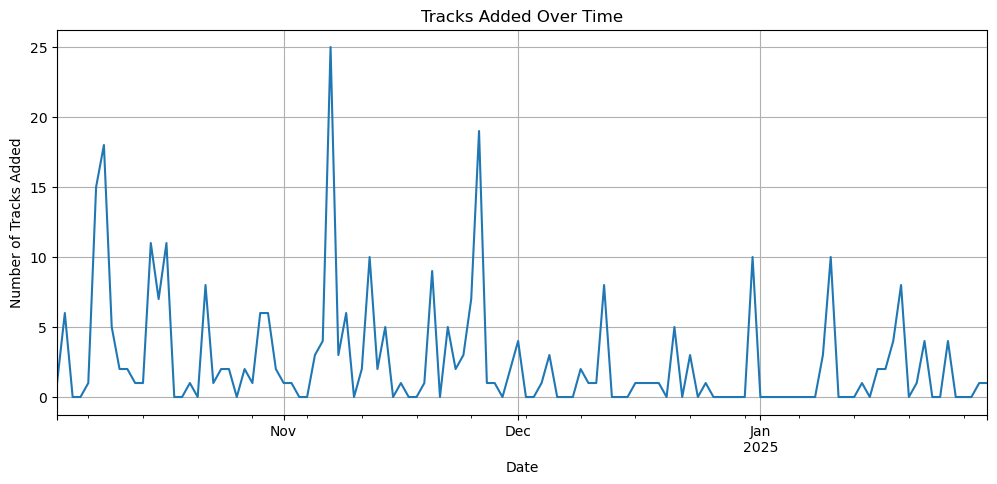

In [6]:
# Plot the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
track_add_trend.plot()
plt.title("Tracks Added Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tracks Added")
plt.grid()
plt.show()

## **Analysis: Behavioral Patterns in Track Additions (Liked Songs)**
Sharp spikes in **early November and mid-December** suggest periods of **high engagement with music discovery**. These could be influenced by:
- **Spotify Wrapped effect** – revisiting top songs and adding favorites before the year ends.
- **New music releases** – seasonal drops from favorite artists may have triggered multiple additions.
- **Mood-based listening** – certain times of the year might encourage revisiting nostalgic tracks or exploring fresh sounds.

A noticeable **decline in January 2025** might indicate **a shift in listening behavior**:
- Moving away from **Liked Songs** and focusing on curated **playlists**.
- Taking a break from active discovery and sticking to **familiar tracks**.
- Less engagement due to external factors such as **workload, travel, or changing daily routines**.

---

## **What This Means for Music Preferences**
### **1. Spikes Suggest Periods of Active Discovery**
   - Music exploration is not constant but rather comes in bursts, likely influenced by **mood, events, or platform recommendations**.  
   - High activity days could correspond with specific genres, artists, or album releases.

### **2. Drop in January May Indicate Shifting Listening Habits**
   - A potential preference for **structured playlists over saving individual songs**.  
   - Exploring more **radio-based listening or algorithm-driven suggestions** instead of manually adding songs.

### **3. Long-Term Listening Evolution**
   - Analyzing repeated spikes across different months could reveal **seasonal genre preferences**.  
   - Comparing track additions with playlist activity could determine if music organization habits are changing.

   ---

# **AddedToPlaylist_Create**
- The following visualizations analyze **tracks added to playlists** over time, by hour of the day, and the most frequently updated playlists. This analysis excludes **Liked Songs**, focusing solely on **custom playlist updates** to understand how playlists are curated over time.

In [14]:
# Load the JSON file
with open("../data/playlist_data/AddedToPlaylist_Create.json", "r") as f:
    data2 = json.load(f)

In [15]:
# Convert JSON to DataFrame
df2 = pd.DataFrame(data)

In [16]:
df2["timestamp_utc"] = pd.to_datetime(df2["timestamp_utc"], format="%Y-%m-%dT%H:%M:%S.%fZ", errors="coerce")

In [17]:
# Extract date and hour for time-based analysis
df2["date"] = df2["timestamp_utc"].dt.date
df2["hour"] = df2["timestamp_utc"].dt.hour

**Frequency of Playlists Being Updated**

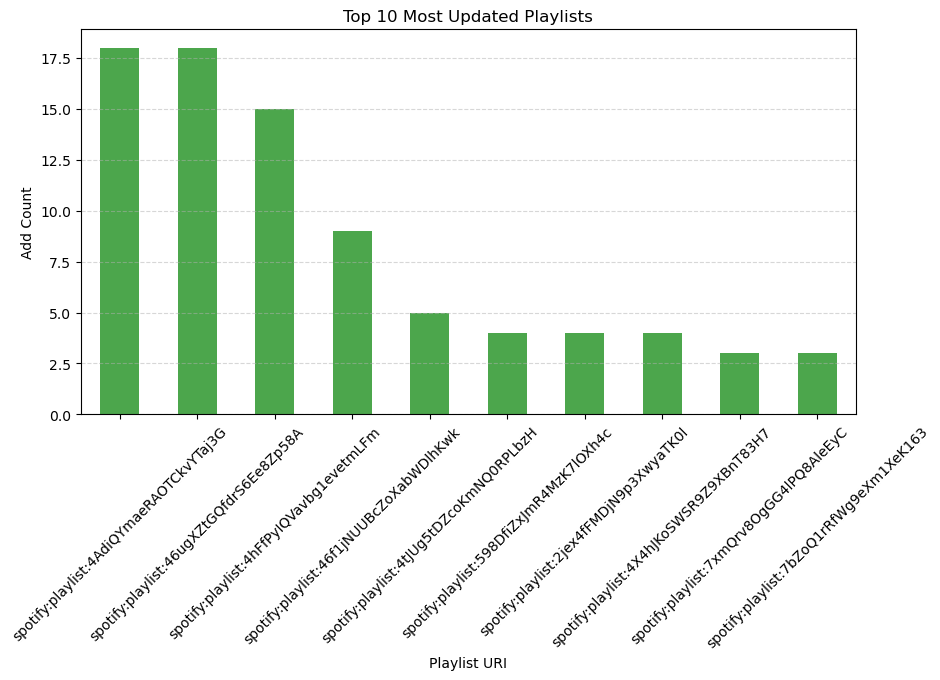

In [19]:
playlist_counts = df["message_playlist_uri"].value_counts().head(10)
plt.figure(figsize=(10, 5))
playlist_counts.plot(kind="bar", color="green", alpha=0.7)
plt.xlabel("Playlist URI")
plt.ylabel("Add Count")
plt.title("Top 10 Most Updated Playlists")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


The bar chart highlights the **top 10 playlists** that received the most track additions. Some playlists are updated far more frequently than others, which suggests a mix of **actively maintained playlists** versus those that receive occasional updates. 

A few playlists have significantly higher additions, indicating either:
- **Regular curation** (e.g., updating workout, study, or mood-based playlists)
- **Temporary or experimental lists** where tracks are added before being filtered out later.

---


**Frequency of Time Based Trends**

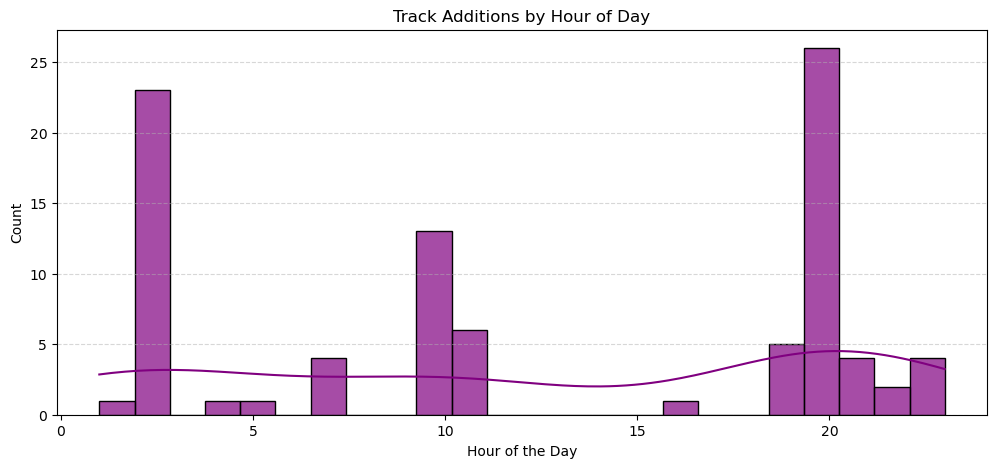

In [22]:
plt.figure(figsize=(12, 5))
sns.histplot(df2["hour"], bins=24, kde=True, color="purple", alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Track Additions by Hour of Day")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

The histogram reveals **preferred hours for adding tracks to playlists**. Peak activity occurs:
- **Late night (around 12 AM - 2 AM)**
- **Mid-morning (10 AM)**
- **Evening (8-10 PM)**

Late-night spikes suggest playlist curation as part of **wind-down routines**, while mid-morning peaks may reflect **music discovery during morning activities**. Lower afternoon activity indicates that playlist organization is **not a priority during work hours**.

---

**Date-Wise Additions**

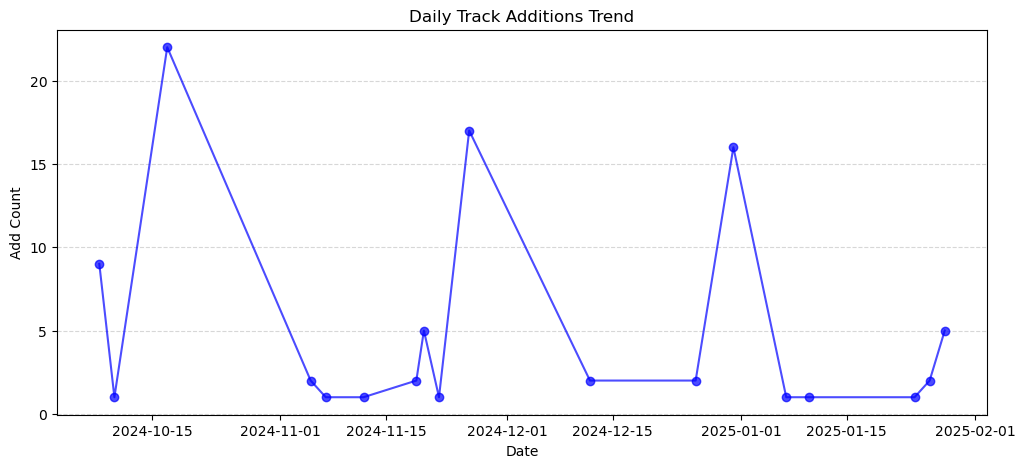

In [23]:
date_counts = df2["date"].value_counts().sort_index()
plt.figure(figsize=(12, 5))
date_counts.plot(kind="line", marker="o", color="blue", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Add Count")
plt.title("Daily Track Additions Trend")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

The line chart shows the **trend of playlist additions over time**. Noticeable spikes suggest bursts of playlist curation, likely influenced by:
- **New music discoveries** (e.g., exploring new releases, recommendations)
- **Mood-based curation** (e.g., updating seasonal or situational playlists)
- **Event-based updates** (e.g., preparing playlists for specific occasions)

Periods of **low or no activity** may indicate reliance on **existing playlists** rather than active curation.

---

## Main Takeaways
1. **Certain playlists receive far more updates**, suggesting they serve dynamic purposes like **workouts, moods, or favorite tracks.**
2. **Music discovery is most active late at night and mid-morning**, aligning with relaxation or focused activities.
3. **Playlist curation follows a cyclical pattern**, with bursts of high activity followed by quieter phases.

# **AddedToCollection vs. AddedToPlaylist_Create**

In [44]:
# Load JSON files
playlist_create_path = "../data/playlist_data/AddedToPlaylist_Create.json"
collection_path = "../data/playlist_data/AddedToCollection.json"

In [45]:
# Load AddedToPlaylist_Create JSON
with open(playlist_create_path, "r") as f:
    added_to_playlist_create_data = json.load(f)
df_added_to_playlist_create = pd.DataFrame(added_to_playlist_create_data)

In [46]:
# Load AddedToCollection JSON
with open(collection_path, "r") as f:
    added_to_collection_data = json.load(f)
df_added_to_collection = pd.DataFrame(added_to_collection_data)

In [47]:
# Convert timestamps to datetime
df_added_to_playlist_create["timestamp_utc"] = pd.to_datetime(df_added_to_playlist_create["timestamp_utc"], errors="coerce")
df_added_to_collection["timestamp_utc"] = pd.to_datetime(df_added_to_collection["timestamp_utc"], errors="coerce")

In [48]:
# Extract date for time-based analysis
df_added_to_playlist_create["date"] = df_added_to_playlist_create["timestamp_utc"].dt.date
df_added_to_collection["date"] = df_added_to_collection["timestamp_utc"].dt.date

In [49]:
# Count occurrences of tracks in both datasets
playlist_tracks = df_added_to_playlist_create["message_item_uri"].value_counts()
collection_tracks = df_added_to_collection["message_item_uri"].value_counts()

In [50]:
# Merge counts to compare track appearance in both datasets
df_track_comparison = pd.DataFrame({
    "Added to Playlist (Create)": playlist_tracks,
    "Added to Collection": collection_tracks
}).fillna(0)

In [51]:
# Sort by total occurrences
df_track_comparison["Total"] = df_track_comparison.sum(axis=1)
df_track_comparison = df_track_comparison.sort_values(by="Total", ascending=False)

# **Heatmap Frequency Comparison**

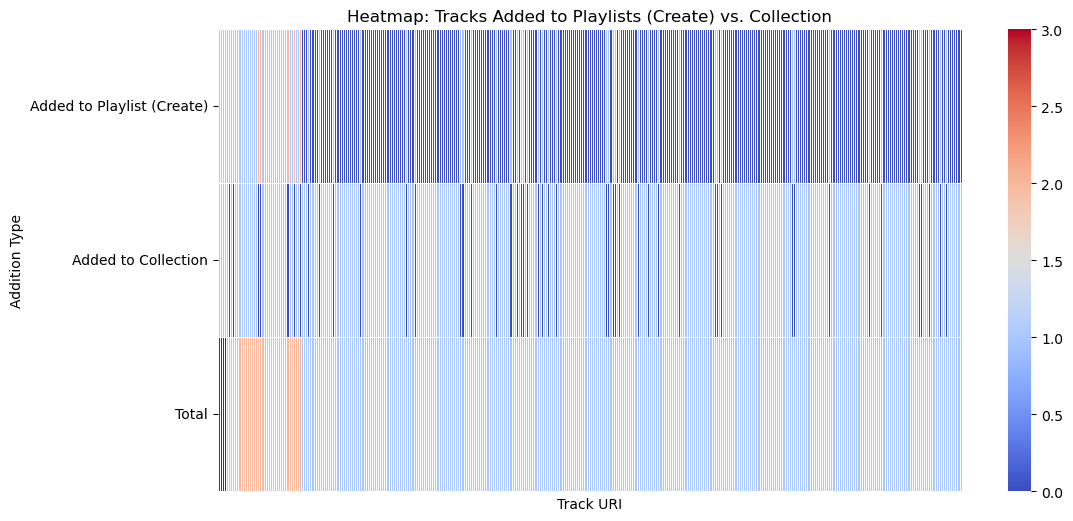

In [54]:
# Plot comparison of all tracks appearing in both datasets
plt.figure(figsize=(12, 6))
sns.heatmap(df_track_comparison.T, cmap="coolwarm", annot=False, linewidths=0.5, cbar=True)

plt.title("Heatmap: Tracks Added to Playlists (Create) vs. Collection")
plt.xlabel("Track URI")
plt.ylabel("Addition Type")
plt.xticks([])
plt.show()

The heatmap visualizes the frequency of track additions to playlists compared to additions to the general collection. The intensity of colors represents how often certain tracks were added across both categories. The majority of tracks appear sparsely across both datasets, suggesting a diverse selection of songs being added rather than frequent re-additions of the same tracks. Some tracks show higher intensity in the "Total" row, indicating repeated additions across both playlists and the collection. A higher frequency of duplication suggests certain tracks hold greater personal significance or are frequently rotated across different playlists.

# **Time-Series Analysis Comparison**

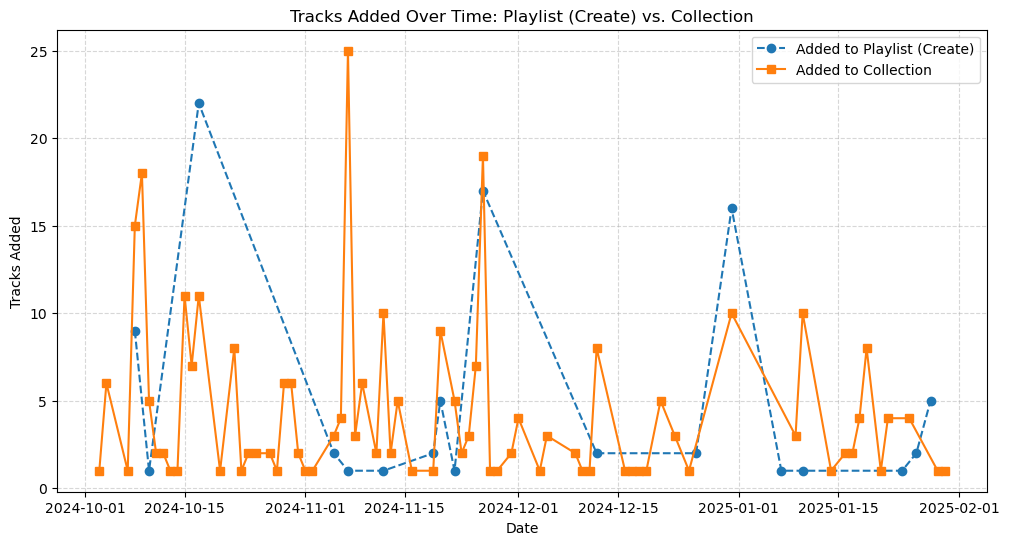

In [55]:
plt.figure(figsize=(12, 6))
df_added_to_playlist_create.groupby("date").size().plot(label="Added to Playlist (Create)", linestyle="--", marker="o")
df_added_to_collection.groupby("date").size().plot(label="Added to Collection", linestyle="-", marker="s")

plt.xlabel("Date")
plt.ylabel("Tracks Added")
plt.title("Tracks Added Over Time: Playlist (Create) vs. Collection")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

The time-series comparison provides insight into the fluctuation of adding songs to playlists versus adding them to the collection. Peaks in both lines indicate periods of increased music organization and curation, but the two trends do not always align. Playlist additions tend to have more pronounced spikes, reflecting focused efforts to update playlists in bursts rather than consistently over time. Collection additions, while also spiky, follow a slightly more frequent pattern, reinforcing the idea that songs are more casually saved over time compared to deliberate playlist management.

---

# **Main Takeaways/Analysis:**

## Patterns in Music Curation Behavior
Track additions to playlists happen in concentrated bursts, reflecting intentional curation rather than continuous updates. Playlist management appears to be a task-based activity rather than a spontaneous one. Leveraging AI-driven playlist suggestions at these key moments could enhance engagement and streamline the process.

## Differences in Collection vs. Playlist Additions
Collection additions occur more frequently and steadily, suggesting a habit of passively saving tracks rather than actively organizing them. Saved songs might serve as bookmarks for later listening, while playlists require more effort and categorization. An automated feature that prompts users to revisit and organize saved songs could improve long-term engagement.

## Music Consumption Trends and Peak Activity
Spikes in both collection and playlist additions highlight key engagement periods. External factors such as new music releases, seasonal shifts, or personal listening habits likely influence these trends. Aligning content recommendations and platform notifications with these high-activity windows could increase retention and interaction.

## Preference for Adding to Collection Over Playlists
More songs are saved to the collection than added to playlists, emphasizing a stronger tendency toward passive accumulation rather than structured organization. A system that periodically groups saved tracks into suggested playlists could make the experience more dynamic and user-friendly.